In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/russia-and-ukraine/corpus_date_2.pkl
/kaggle/input/russia-ukraine-wars/corpus.pkl
/kaggle/input/russia-ukraine-wars/cv.pkl
/kaggle/input/russia-ukraine-wars/dataframe.pkl
/kaggle/input/russia-ukraine-wars/corpus_date.pkl
/kaggle/input/russia-ukraine-wars/dataterm.pkl
/kaggle/input/russia-ukraine-wars/dtm.pkl


In [2]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('/kaggle/input/russia-ukraine-wars/dtm.pkl')
data

,border,russia,russian,war
0,1,0,1,0
1,1,0,3,0
2,1,0,1,0
3,1,0,1,0
4,1,1,1,0
...,...,...,...,...
272477,0,0,0,1
272478,0,1,0,1
272479,0,1,0,1
272480,0,2,0,1


In [3]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('/kaggle/input/russia-ukraine-wars/dataterm.pkl')
data

,aa,abandoned,abhinandan,ability,able,abm,abortion,absolute,absolutely,absorbed,...,zelenksy,zelensky,zelenskyy,zhytomyr,zionazi,zoka,zone,zones,zoomed,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [5]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abhinandan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)
print(corpus)

In [7]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("/kaggle/input/russia-ukraine-wars/cv.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [8]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.056*"thermobaric" + 0.047*"relative" + 0.046*"bagchi" + 0.019*"related" + 0.015*"mercilessly" + 0.008*"una" + 0.006*"overseas" + 0.006*"experts" + 0.006*"owns" + 0.005*"threatening"'),
 (1,
  '0.047*"relative" + 0.045*"thermobaric" + 0.043*"bagchi" + 0.018*"mercilessly" + 0.013*"related" + 0.013*"positive" + 0.007*"absolutely" + 0.005*"ukranian" + 0.005*"tbf" + 0.005*"objects"')]

**without gensim**

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# Define the parameter grid
grid_params = {'n_components' : list(range(5, 10))}

# Instantiate LDA model
lda = LatentDirichletAllocation()

# Create GridSearchCV object
lda_model = GridSearchCV(lda, param_grid=grid_params)

# Fit the model to your document-term matrix
lda_model.fit(data)

# Get the best LDA model
best_lda_model = lda_model.best_estimator_

# Print the best parameters and evaluation metrics
print("Best LDA model's params:", lda_model.best_params_)
print("Best log likelihood Score for the LDA model:", lda_model.best_score_)
print("LDA model Perplexity on train data:", best_lda_model.perplexity(data))


Best LDA model's params: {'n_components': 5}
Best log likelihood Score for the LDA model: -40384.48001897304
LDA model Perplexity on train data: 1463.5613728182668


In [10]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.052*"thermobaric" + 0.040*"relative" + 0.039*"bagchi" + 0.020*"related" + 0.015*"mercilessly" + 0.013*"positive" + 0.006*"threatening" + 0.006*"tbf" + 0.006*"una" + 0.005*"longest"'),
 (1,
  '0.056*"thermobaric" + 0.053*"relative" + 0.050*"bagchi" + 0.021*"related" + 0.018*"mercilessly" + 0.009*"experts" + 0.008*"overseas" + 0.007*"absolutely" + 0.007*"positive" + 0.006*"objects"'),
 (2,
  '0.052*"relative" + 0.051*"thermobaric" + 0.046*"bagchi" + 0.014*"mercilessly" + 0.011*"related" + 0.007*"tbf" + 0.006*"una" + 0.006*"absolutely" + 0.006*"cuba" + 0.005*"mig"'),
 (3,
  '0.037*"thermobaric" + 0.034*"bagchi" + 0.033*"relative" + 0.021*"mercilessly" + 0.014*"positive" + 0.010*"related" + 0.007*"experts" + 0.007*"luhansk" + 0.005*"una" + 0.005*"defund"')]

In [11]:
# LDA for num_topics = 5
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.045*"thermobaric" + 0.039*"bagchi" + 0.038*"relative" + 0.011*"related" + 0.007*"mercilessly" + 0.007*"una" + 0.006*"overseas" + 0.004*"positive" + 0.004*"insane" + 0.004*"tbf"'),
 (1,
  '0.019*"bagchi" + 0.018*"thermobaric" + 0.017*"relative" + 0.007*"absolutely" + 0.006*"ukranian" + 0.005*"positive" + 0.004*"related" + 0.004*"articles" + 0.004*"threatening" + 0.003*"slang"'),
 (2,
  '0.056*"thermobaric" + 0.047*"relative" + 0.044*"bagchi" + 0.023*"related" + 0.015*"mercilessly" + 0.008*"tbf" + 0.006*"una" + 0.005*"overseas" + 0.005*"idiot" + 0.004*"owns"'),
 (3,
  '0.057*"thermobaric" + 0.052*"relative" + 0.051*"bagchi" + 0.024*"mercilessly" + 0.016*"related" + 0.010*"positive" + 0.008*"experts" + 0.007*"absolutely" + 0.006*"objects" + 0.006*"essential"'),
 (4,
  '0.053*"relative" + 0.051*"thermobaric" + 0.045*"bagchi" + 0.018*"related" + 0.016*"mercilessly" + 0.015*"positive" + 0.006*"experts" + 0.006*"una" + 0.006*"absolutely" + 0.005*"tbf"')]

**Topic Modeling - Attempt #2 (Nouns Only)**

In [12]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Let's create a function to pull out nouns from a string of text

from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [14]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('/kaggle/input/russia-and-ukraine/corpus_date_2.pkl')
data_clean

,content,date,cleaned_content
0,is that the same expensive and ineffective bor...,2022-03-05,expensive ineffective border wall smugglers br...
1,so the americans are dressing up as russ...,2022-03-05,americans dressing russians crossing russian b...
2,maybe if one military unit from ukraine crosse...,2022-03-05,maybe one military unit ukraine crossed border...
3,volunteers cross polish border into ukraine to...,2022-03-05,volunteers cross polish border ukraine fight r...
4,but theres no russian aircraft flying nea...,2022-03-05,theres russian aircraft flying near lviv carve...
...,...,...,...
284659,rusia wants to take back ukraine they are our...,2021-12-31,rusia wants take back ukraine allies guess gon...
284660,a positive for russia is that according to us...,2021-12-31,positive russia according ushakov biden pledge...
284661,resists further invades because already ...,2021-12-31,resists invades already russia invaded waging ...
284662,i fully support ukraine s sovereignty but...,2021-12-31,fully support ukraine sovereignty going war ru...


In [15]:
data_clean=data_clean.head(100)


In [16]:
data_clean

,content,date,cleaned_content
0,is that the same expensive and ineffective bor...,2022-03-05,expensive ineffective border wall smugglers br...
1,so the americans are dressing up as russ...,2022-03-05,americans dressing russians crossing russian b...
2,maybe if one military unit from ukraine crosse...,2022-03-05,maybe one military unit ukraine crossed border...
3,volunteers cross polish border into ukraine to...,2022-03-05,volunteers cross polish border ukraine fight r...
4,but theres no russian aircraft flying nea...,2022-03-05,theres russian aircraft flying near lviv carve...
...,...,...,...
95,ukraine help will come but just asking ...,2022-03-05,ukraine help come asking students waiting long...
96,steven seagal is willing to reboot footloose ...,2022-03-05,steven seagal willing reboot footloose set rus...
97,yesterday president zelenskyy said immediate ...,2022-03-05,yesterday president zelenskyy said immediate c...
98,graham dated after the build up of some ...,2022-03-05,graham dated build russian troops border ukrai...


In [17]:
# Apply the nouns function to the transcripts to filter only on nouns
#nltk-->'punkt'
data_nouns = pd.DataFrame(data_clean.cleaned_content.apply(nouns))
data_nouns

,cleaned_content
0,border wall smugglers times couple years rosed...
1,americans russians border bombs equipment ukraine
2,unit border city putin
3,volunteers border fight russian forces
4,theres aircraft carve zone ground poland borde...
...,...
95,help students border months
96,reboot footloose border peace region story dan...
97,yesterday president zelenskyy closure skies st...
98,graham troops relevance


In [18]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'and',
                  'or', 'a', 'the', 'for', 'you']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
#stop_words = stopwords.words('english')
# # Recreate a document-term matrix with only nouns
# cvn = CountVectorizer(stop_words=list(stop_words))
# data_cvn = cvn.fit_transform(data_nouns.cleaned_content)
# data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
# data_dtmn.index = data_nouns.index
# data_dtmn

In [19]:
# Recreate a document-term matrix with only nouns
# cvn = CountVectorizer(stop_words=stop_words)
cvn = CountVectorizer(stop_words=list(stop_words))
data_cvn = cvn.fit_transform(data_nouns['cleaned_content'])
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns.index
data_dtmn

,abhinandan,ability,abortion,access,action,actor,administration,adults,aggression,agreement,...,year,years,yes,yesterday,yrs,zelensky,zelenskyy,zone,zones,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
 #Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [21]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.050*"border" + 0.015*"russia" + 0.012*"ukraine" + 0.012*"nato" + 0.009*"missiles" + 0.007*"place" + 0.007*"putin" + 0.007*"years" + 0.007*"yes" + 0.007*"problem"'),
 (1,
  '0.075*"border" + 0.023*"russia" + 0.020*"putin" + 0.016*"forces" + 0.016*"troops" + 0.013*"ukraine" + 0.010*"war" + 0.010*"nato" + 0.010*"countries" + 0.009*"poland"')]

In [22]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.049*"border" + 0.023*"nato" + 0.022*"troops" + 0.022*"russia" + 0.012*"putin" + 0.011*"ukraine" + 0.009*"poland" + 0.009*"aircraft" + 0.009*"bases" + 0.009*"europe"'),
 (1,
  '0.067*"border" + 0.028*"russia" + 0.014*"students" + 0.010*"ukrainians" + 0.008*"ukraine" + 0.008*"country" + 0.007*"invasion" + 0.007*"equipment" + 0.007*"problem" + 0.007*"forces"'),
 (2,
  '0.075*"border" + 0.025*"putin" + 0.023*"forces" + 0.018*"ukraine" + 0.016*"war" + 0.013*"russia" + 0.010*"countries" + 0.010*"russian" + 0.010*"amp" + 0.010*"nato"')]

In [23]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.067*"border" + 0.024*"russia" + 0.022*"putin" + 0.018*"ukraine" + 0.016*"troops" + 0.013*"nato" + 0.010*"years" + 0.010*"missiles" + 0.010*"economy" + 0.010*"donbas"'),
 (1,
  '0.062*"border" + 0.027*"russia" + 0.022*"nato" + 0.020*"putin" + 0.014*"poland" + 0.014*"students" + 0.014*"amp" + 0.011*"troops" + 0.011*"neighbor" + 0.009*"aircraft"'),
 (2,
  '0.079*"border" + 0.025*"forces" + 0.015*"city" + 0.013*"russian" + 0.012*"ukraine" + 0.011*"russia" + 0.010*"kharkiv" + 0.009*"troops" + 0.009*"war" + 0.008*"country"'),
 (3,
  '0.051*"border" + 0.023*"fight" + 0.018*"war" + 0.016*"invasion" + 0.016*"ukraine" + 0.016*"russia" + 0.016*"volunteers" + 0.016*"countries" + 0.016*"forces" + 0.012*"news"')]

**Topic Modeling - Attempt #3 (Nouns and Adjectives)**

In [24]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [25]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.cleaned_content.apply(nouns_adj))
data_nouns_adj

,cleaned_content
0,expensive ineffective border wall smugglers ti...
1,americans russians russian border russian bomb...
2,military unit ukraine border inialaited russia...
3,volunteers polish border ukraine fight russian...
4,theres russian aircraft lviv carve safe zone g...
...,...
95,ukraine help students long russian military uk...
96,steven seagal willing reboot footloose russian...
97,yesterday president zelenskyy immediate closur...
98,graham build russian troops ukraine relevance


In [26]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=list(stop_words), max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.cleaned_content)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,abhinandan,ability,able,abortion,access,acting,action,actor,administration,adults,...,year,years,yes,yesterday,yrs,zelensky,zelenskyy,zone,zones,zubrin
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [28]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.026*"nato" + 0.019*"russia" + 0.017*"putin" + 0.008*"ukrainian" + 0.008*"countries" + 0.007*"students" + 0.007*"military" + 0.006*"amp" + 0.006*"polish" + 0.006*"country"'),
 (1,
  '0.017*"russia" + 0.016*"troops" + 0.016*"forces" + 0.012*"nato" + 0.010*"putin" + 0.009*"fight" + 0.008*"invasion" + 0.008*"stop" + 0.007*"war" + 0.007*"poland"')]

In [29]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.025*"russia" + 0.015*"troops" + 0.013*"putin" + 0.012*"forces" + 0.012*"fight" + 0.010*"stop" + 0.010*"polish" + 0.009*"war" + 0.007*"city" + 0.007*"invasion"'),
 (1,
  '0.019*"russia" + 0.012*"nato" + 0.011*"missiles" + 0.009*"forces" + 0.009*"putin" + 0.007*"russians" + 0.007*"amp" + 0.007*"cia" + 0.007*"west" + 0.007*"new"'),
 (2,
  '0.039*"nato" + 0.018*"putin" + 0.010*"students" + 0.009*"amp" + 0.009*"ukrainian" + 0.009*"forces" + 0.009*"countries" + 0.009*"russia" + 0.008*"fly" + 0.007*"poland"')]

In [30]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.035*"nato" + 0.023*"russia" + 0.015*"putin" + 0.014*"forces" + 0.012*"amp" + 0.010*"ukrainian" + 0.010*"war" + 0.010*"students" + 0.010*"troops" + 0.009*"countries"'),
 (1,
  '0.014*"nato" + 0.012*"city" + 0.012*"russia" + 0.010*"forces" + 0.010*"stop" + 0.010*"putin" + 0.007*"new" + 0.007*"kharkiv" + 0.007*"nuclear" + 0.007*"ready"'),
 (2,
  '0.024*"russia" + 0.009*"economy" + 0.009*"live" + 0.007*"troops" + 0.007*"problem" + 0.007*"invasion" + 0.006*"russians" + 0.006*"possible" + 0.006*"map" + 0.006*"bases"'),
 (3,
  '0.021*"polish" + 0.021*"putin" + 0.021*"fight" + 0.013*"troops" + 0.011*"poland" + 0.011*"russia" + 0.011*"volunteers" + 0.011*"forces" + 0.008*"place" + 0.008*"countries"')]

In [31]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
for idx, topic in ldana.print_topics(-1):
    print("Topic {}: {}".format(idx + 1, topic))

Topic 1: 0.039*"russia" + 0.014*"nato" + 0.013*"poland" + 0.011*"war" + 0.010*"troops" + 0.009*"countries" + 0.007*"russians" + 0.007*"help" + 0.007*"fight" + 0.007*"donbas"
Topic 2: 0.023*"forces" + 0.013*"fight" + 0.011*"ukrainian" + 0.011*"volunteers" + 0.011*"polish" + 0.008*"news" + 0.008*"amp" + 0.008*"victory" + 0.008*"peace" + 0.008*"labs"
Topic 3: 0.039*"putin" + 0.035*"nato" + 0.022*"russia" + 0.009*"polish" + 0.009*"military" + 0.009*"countries" + 0.007*"ukrainians" + 0.007*"neighbor" + 0.007*"students" + 0.007*"nuclear"
Topic 4: 0.018*"nato" + 0.014*"troops" + 0.014*"forces" + 0.011*"city" + 0.011*"invasion" + 0.011*"amp" + 0.009*"fly" + 0.009*"ukrainian" + 0.009*"new" + 0.009*"putin"


In [32]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=80)
for idx, topic in ldana.print_topics(-1):
    print("Topic {}: {}".format(idx + 1, topic))

Topic 1: 0.045*"putin" + 0.045*"nato" + 0.015*"military" + 0.010*"poland" + 0.010*"neighbor" + 0.010*"excuse" + 0.010*"countries" + 0.010*"afraid" + 0.010*"membership" + 0.010*"sense"
Topic 2: 0.023*"polish" + 0.020*"forces" + 0.013*"amp" + 0.013*"volunteers" + 0.013*"fight" + 0.010*"missiles" + 0.010*"news" + 0.010*"stop" + 0.010*"anti" + 0.010*"russia"
Topic 3: 0.025*"russia" + 0.015*"students" + 0.011*"ukrainian" + 0.008*"help" + 0.008*"problem" + 0.008*"invasion" + 0.008*"asylum" + 0.008*"possible" + 0.008*"combat" + 0.008*"economy"
Topic 4: 0.018*"russia" + 0.013*"troops" + 0.013*"forces" + 0.011*"invasion" + 0.011*"amp" + 0.008*"war" + 0.008*"country" + 0.008*"yes" + 0.008*"military" + 0.008*"nato"
Topic 5: 0.026*"russia" + 0.022*"nato" + 0.016*"troops" + 0.011*"war" + 0.011*"countries" + 0.009*"poland" + 0.009*"city" + 0.009*"fight" + 0.009*"ukrainian" + 0.009*"kharkiv"


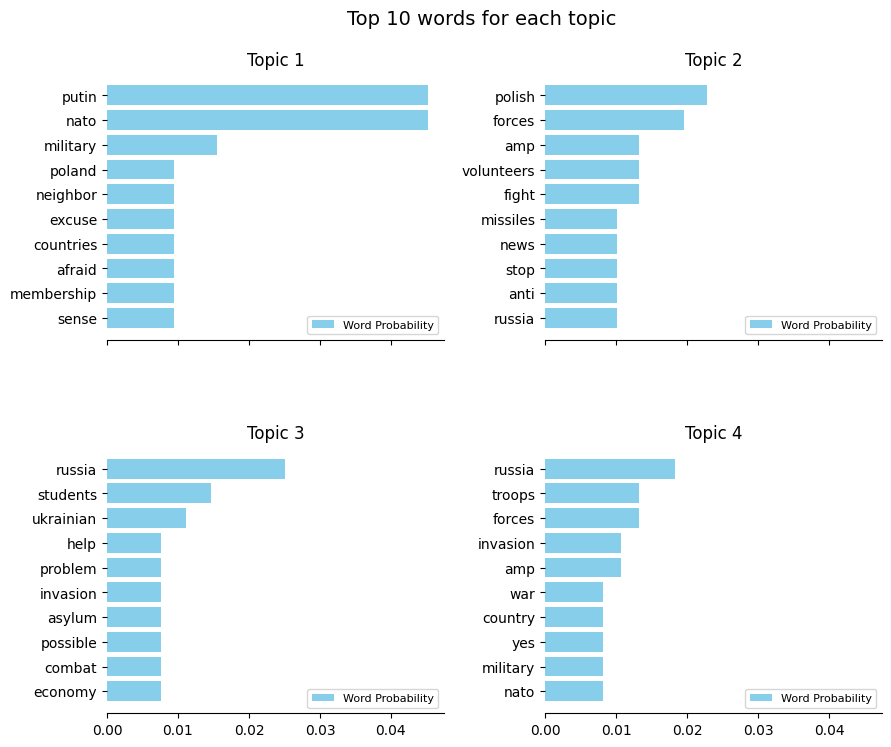

In [33]:
import matplotlib.pyplot as plt

# Define function to plot topics as bar plots with legends
def plot_topics(lda_model):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)
    axes = axes.flatten()
    for idx, ax in enumerate(axes):
        topic = lda_model.show_topic(idx, topn=10)
        topic_words = [word for word, _ in topic]
        topic_probs = [prob for _, prob in topic]
        ax.barh(topic_words, topic_probs, color='skyblue', label='Word Probability')
        ax.set_title(f'Topic {idx + 1}', fontsize=12)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.legend(loc='lower right', fontsize=8)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Top 10 words for each topic', fontsize=14)
        plt.subplots_adjust(top=0.9, bottom=0.1, wspace=0.3, hspace=0.4)

# Call the function to plot topics for your LDA model
plot_topics(ldana)
plt.show()


In [34]:
# Let's take a look at which topics each tweet contains
corpus_transformed = ldana[corpusna]

# Unpack the values from corpus_transformed
topics_per_transcript = [[a for (a, b) in doc] for doc in corpus_transformed]

# Combine with transcript indices
topics_with_indices = list(zip(topics_per_transcript, data_dtmna.index))

# Print the result
for idx, topic in ldana.print_topics(-1):
     print("Topic {}: {}".format(idx + 1, topic))

Topic 1: 0.045*"putin" + 0.045*"nato" + 0.015*"military" + 0.010*"poland" + 0.010*"neighbor" + 0.010*"excuse" + 0.010*"countries" + 0.010*"afraid" + 0.010*"membership" + 0.010*"sense"
Topic 2: 0.023*"polish" + 0.020*"forces" + 0.013*"amp" + 0.013*"volunteers" + 0.013*"fight" + 0.010*"missiles" + 0.010*"news" + 0.010*"stop" + 0.010*"anti" + 0.010*"russia"
Topic 3: 0.025*"russia" + 0.015*"students" + 0.011*"ukrainian" + 0.008*"help" + 0.008*"problem" + 0.008*"invasion" + 0.008*"asylum" + 0.008*"possible" + 0.008*"combat" + 0.008*"economy"
Topic 4: 0.018*"russia" + 0.013*"troops" + 0.013*"forces" + 0.011*"invasion" + 0.011*"amp" + 0.008*"war" + 0.008*"country" + 0.008*"yes" + 0.008*"military" + 0.008*"nato"
Topic 5: 0.026*"russia" + 0.022*"nato" + 0.016*"troops" + 0.011*"war" + 0.011*"countries" + 0.009*"poland" + 0.009*"city" + 0.009*"fight" + 0.009*"ukrainian" + 0.009*"kharkiv"


In [35]:
# Let's take a look at which topics each transcript contains
topics_per_document = []
for doc_topics in corpus_transformed:
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    dominant_topic = doc_topics[0][0]
    topics_per_document.append(dominant_topic)

# Pair each document's index with its assigned topic
topics_with_documents = list(zip(topics_per_document, data_dtmna.index))
topics_with_documents


[(2, 0),
 (0, 1),
 (0, 2),
 (1, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (1, 8),
 (0, 9),
 (3, 10),
 (1, 11),
 (4, 12),
 (2, 13),
 (4, 14),
 (0, 15),
 (0, 16),
 (2, 17),
 (1, 18),
 (1, 19),
 (3, 20),
 (0, 21),
 (3, 22),
 (1, 23),
 (2, 24),
 (1, 25),
 (4, 26),
 (4, 27),
 (1, 28),
 (4, 29),
 (2, 30),
 (3, 31),
 (3, 32),
 (0, 33),
 (2, 34),
 (3, 35),
 (4, 36),
 (4, 37),
 (1, 38),
 (4, 39),
 (3, 40),
 (3, 41),
 (4, 42),
 (3, 43),
 (0, 44),
 (4, 45),
 (4, 46),
 (3, 47),
 (4, 48),
 (0, 49),
 (4, 50),
 (0, 51),
 (0, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (3, 56),
 (2, 57),
 (4, 58),
 (1, 59),
 (3, 60),
 (0, 61),
 (3, 62),
 (1, 63),
 (3, 64),
 (1, 65),
 (2, 66),
 (4, 67),
 (1, 68),
 (2, 69),
 (4, 70),
 (3, 71),
 (3, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (4, 76),
 (4, 77),
 (0, 78),
 (2, 79),
 (0, 80),
 (2, 81),
 (2, 82),
 (3, 83),
 (4, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (4, 88),
 (3, 89),
 (1, 90),
 (3, 91),
 (4, 92),
 (3, 93),
 (3, 94),
 (0, 95),
 (4, 96),
 (4, 97),
 (3, 98),
 (0, 99)]

In [36]:
#Part 1
ldana = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=50)
for idx, topic in ldana.print_topics(-1):
     print("Topic {}: {}".format(idx + 1, topic))

Topic 1: 0.013*"putin" + 0.013*"poland" + 0.013*"lethal" + 0.013*"aid" + 0.009*"equipment" + 0.009*"problem" + 0.009*"place" + 0.009*"issue" + 0.009*"ukranians" + 0.009*"damage"
Topic 2: 0.040*"russia" + 0.018*"nato" + 0.014*"air" + 0.011*"live" + 0.008*"country" + 0.007*"fly" + 0.007*"yes" + 0.007*"nuclear" + 0.007*"cross" + 0.007*"years"
Topic 3: 0.029*"polish" + 0.019*"nato" + 0.016*"troops" + 0.016*"forces" + 0.013*"military" + 0.013*"war" + 0.013*"volunteers" + 0.013*"fight" + 0.013*"russia" + 0.010*"long"
Topic 4: 0.024*"russia" + 0.020*"nato" + 0.014*"stop" + 0.010*"war" + 0.010*"students" + 0.010*"forces" + 0.010*"ukrainian" + 0.010*"soviet" + 0.010*"labs" + 0.010*"bio"
Topic 5: 0.023*"troops" + 0.022*"amp" + 0.020*"russia" + 0.015*"eastern" + 0.015*"putin" + 0.012*"ukrainians" + 0.008*"cia" + 0.008*"russians" + 0.008*"invasion" + 0.008*"city"
Topic 6: 0.039*"nato" + 0.028*"putin" + 0.020*"forces" + 0.014*"countries" + 0.012*"new" + 0.012*"ukrainian" + 0.012*"kharkiv" + 0.009*"

In [37]:
#part 2
# Function to tokenize and filter for verbs
def verb(text):
    '''Given a string of text, tokenize the text and pull out only the verbs.'''
    is_verb = lambda pos: pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    all_verb = [word for (word, pos) in pos_tag(tokenized) if is_verb(pos)]
    return ' '.join(all_verb)

# Apply the nouns function to the transcripts to filter only on nouns
data_verb = pd.DataFrame(data_clean.cleaned_content.apply(verb))
data_verb

# Create a new document-term matrix using only nouns, adjectives, and verbs, also remove common words with max_df
cvna = CountVectorizer(stop_words=list(stop_words), max_df=.8)
data_cvna = cvna.fit_transform(data_verb.cleaned_content)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names_out())
data_dtmna.index = data_verb.index

# Create the gensim corpus
corpus_verb = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2word_verb = dict((v, k) for k, v in cvna.vocabulary_.items())

# Attempt LDA with verbs
lda_verb = models.LdaModel(corpus=corpus_verb, num_topics=4, id2word=id2word_verb, passes=10)
for idx, topic in ldana.print_topics(-1):
    print("Topic {}: {}".format(idx + 1, topic))

Topic 1: 0.013*"putin" + 0.013*"poland" + 0.013*"lethal" + 0.013*"aid" + 0.009*"equipment" + 0.009*"problem" + 0.009*"place" + 0.009*"issue" + 0.009*"ukranians" + 0.009*"damage"
Topic 2: 0.040*"russia" + 0.018*"nato" + 0.014*"air" + 0.011*"live" + 0.008*"country" + 0.007*"fly" + 0.007*"yes" + 0.007*"nuclear" + 0.007*"cross" + 0.007*"years"
Topic 3: 0.029*"polish" + 0.019*"nato" + 0.016*"troops" + 0.016*"forces" + 0.013*"military" + 0.013*"war" + 0.013*"volunteers" + 0.013*"fight" + 0.013*"russia" + 0.010*"long"
Topic 4: 0.024*"russia" + 0.020*"nato" + 0.014*"stop" + 0.010*"war" + 0.010*"students" + 0.010*"forces" + 0.010*"ukrainian" + 0.010*"soviet" + 0.010*"labs" + 0.010*"bio"
Topic 5: 0.023*"troops" + 0.022*"amp" + 0.020*"russia" + 0.015*"eastern" + 0.015*"putin" + 0.012*"ukrainians" + 0.008*"cia" + 0.008*"russians" + 0.008*"invasion" + 0.008*"city"
Topic 6: 0.039*"nato" + 0.028*"putin" + 0.020*"forces" + 0.014*"countries" + 0.012*"new" + 0.012*"ukrainian" + 0.012*"kharkiv" + 0.009*"